#                                      Boardgames Data Analysis

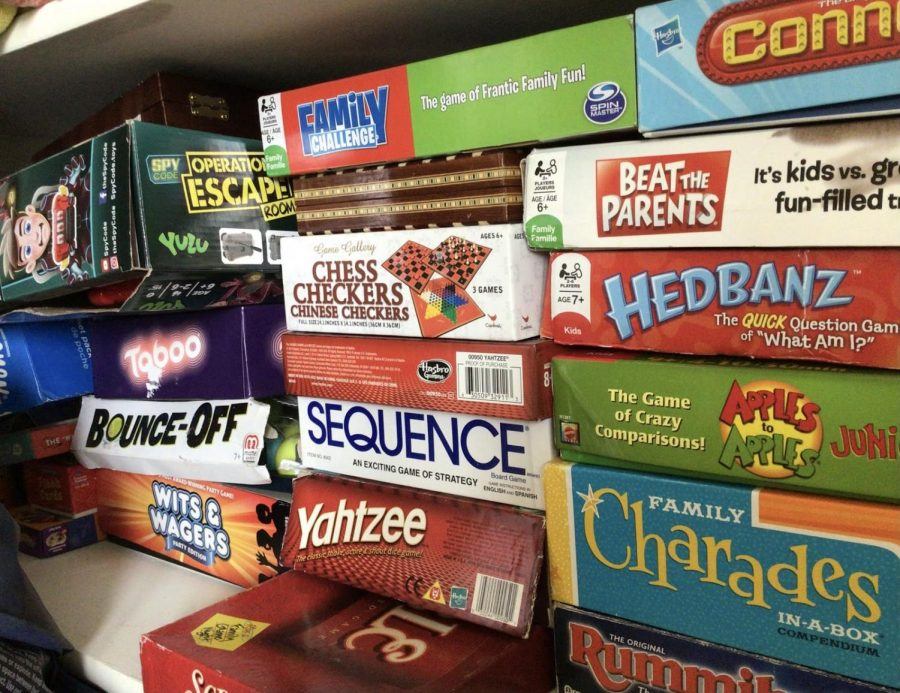

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading data

- Renamed few columns for clarity.
- Displaying column names and first few rows of the data.


In [59]:
brdg_df = pd.read_csv('boardgames1.csv')

In [60]:
brdg_df.columns = brdg_df.columns.str.replace('baverage','geek_rating')
brdg_df.columns = brdg_df.columns.str.replace('average','average_rating')

In [61]:
brdg_df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average_rating', 'geek_rating', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink'],
      dtype='object')

In [7]:
#brdg_df.head(10)

## Initial EDA:

In [64]:
brdg_df.isnull().sum()

In [65]:
brdg_df['min_community'] = brdg_df['min_community'].fillna(brdg_df['min_community'].mean())
brdg_df['max_community'] = brdg_df['max_community'].fillna(brdg_df['max_community'].mean())

In [15]:
brdg_df.isnull().sum()

## Evaluate game geek ratings

Text(0.5, 1.0, 'Board Game Ratings')

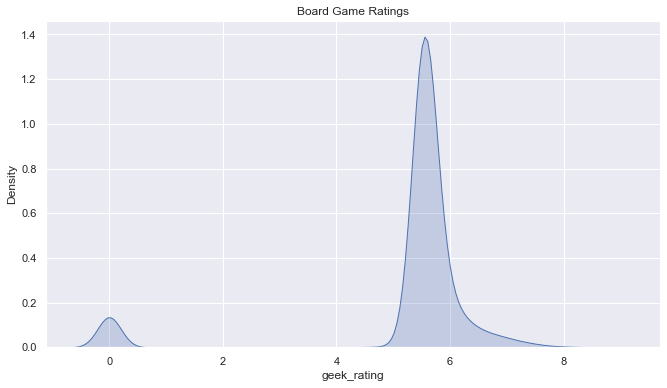

In [66]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(brdg_df['geek_rating'], shade = True).set_title('Board Game Ratings')

### Evaluation of 100 highest rated boardgames

In [67]:
rating_views_top = brdg_df[['name','geek_rating',"siteviews"]]\
        .sort_values('geek_rating',ascending=False).head(150)

Text(0.5, 1.0, 'Top 100 Board Game Ratings')

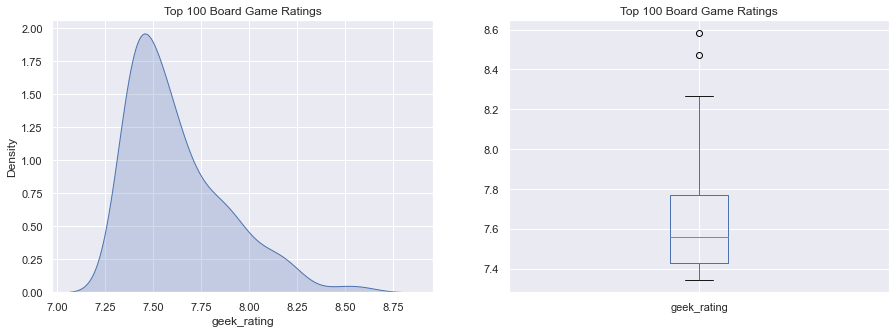

In [68]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(rating_views_top['geek_rating'], shade = True).set_title('Top 100 Board Game Ratings')
plt.subplot(122)
rating_views_top['geek_rating'].plot.box(figsize=(15,5)).set_title('Top 100 Board Game Ratings')

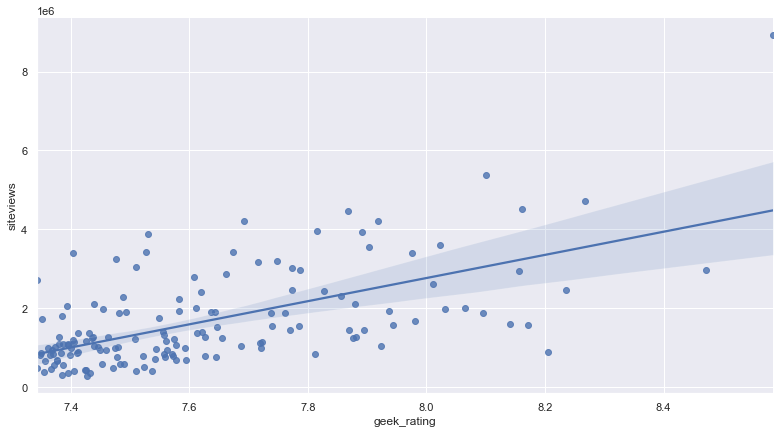

In [69]:
sns.lmplot("geek_rating", "siteviews", rating_views_top, height=6, aspect=1.8)

### Evaluation of 100 lowest rated boardgames

In [70]:
rating_views_bottom = brdg_df[['name','geek_rating',"siteviews"]]\
        .sort_values('geek_rating',ascending=False)\
        .loc[brdg_df.geek_rating > 0,:].tail(150)

Text(0.5, 1.0, 'Bottom 100 Board Game Ratings')

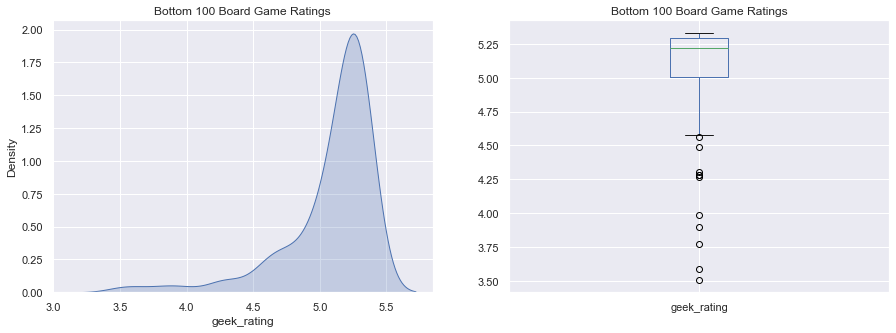

In [71]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(rating_views_bottom['geek_rating'], shade = True).set_title('Bottom 100 Board Game Ratings')
plt.subplot(122)
rating_views_bottom['geek_rating'].plot.box(figsize=(15,5)).set_title('Bottom 100 Board Game Ratings')

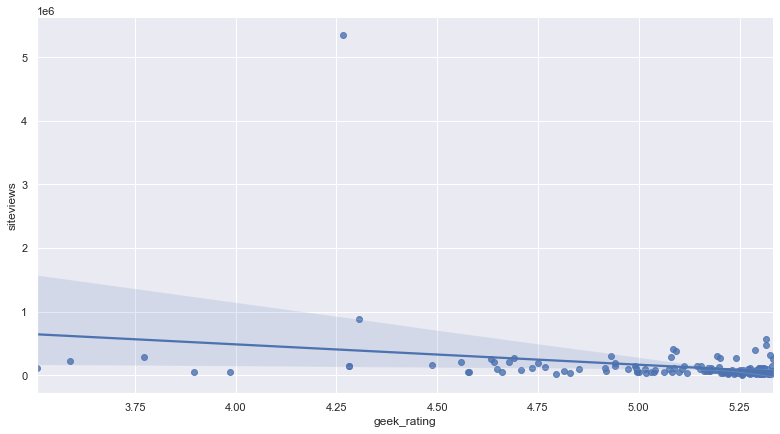

In [72]:
sns.lmplot("geek_rating", "siteviews", rating_views_bottom, height=6, aspect=1.8)

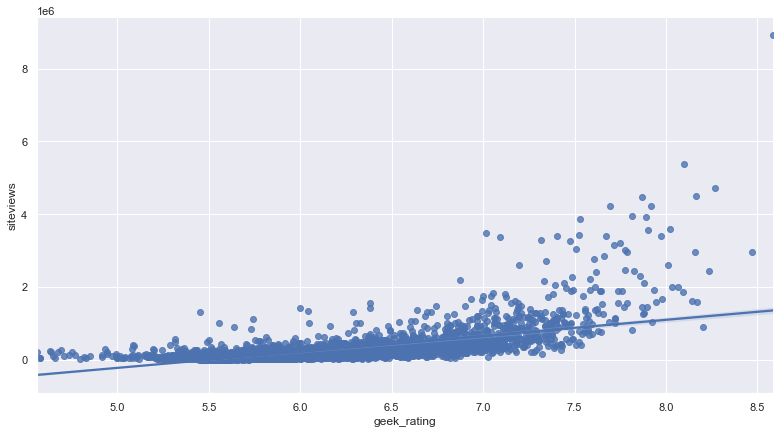

In [74]:
sns.lmplot("geek_rating", "siteviews", brdg_df.loc[brdg_df.geek_rating > 4.5,:], height=6, aspect=1.8)